In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/census_income_data.csv')

##1. Data Analysis

In [5]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<Axes: xlabel='workclass', ylabel='hours.per.week'>

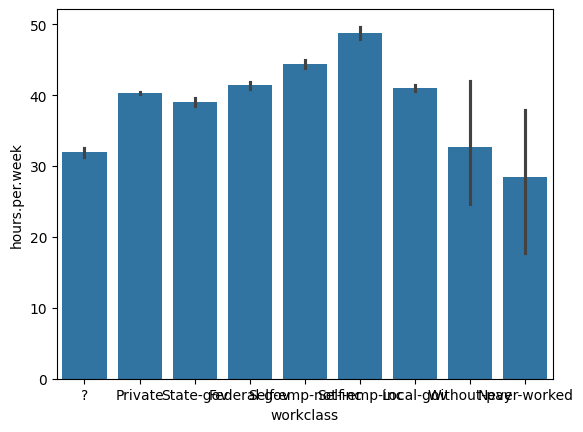

In [6]:
import seaborn as sns
sns.barplot(data = data, x = 'workclass', y = 'hours.per.week')

<Axes: xlabel='age', ylabel='fnlwgt'>

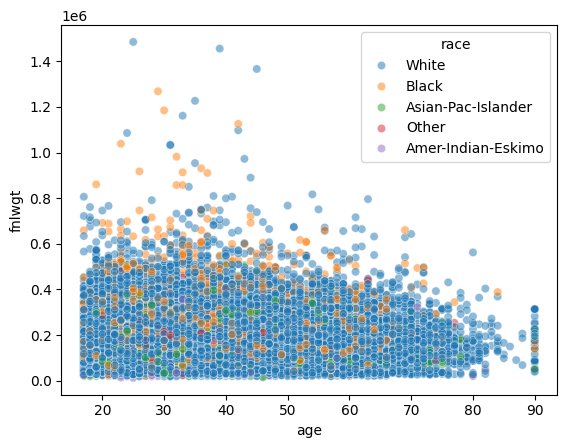

In [7]:
sns.scatterplot(data = data, x = 'age', y = 'fnlwgt', hue= 'race', alpha=0.5)

##2. Feature Engineering

In [8]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [9]:
data['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [10]:
data['workclass'].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [11]:
data['workclass'].replace('?', 'Private', inplace=True)

/tmp/ipython-input-712258736.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace('?', 'Private', inplace=True)


In [12]:
data['education'].value_counts()

,count
education,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


In [13]:
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


In [14]:
data['occupation'].replace('?', 'Prof-specialty', inplace=True)

/tmp/ipython-input-2936614808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['occupation'].replace('?', 'Prof-specialty', inplace=True)


In [15]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [16]:
X = data.drop('income', axis=1)
y = data['income'].values

In [17]:
X_transformed = pd.get_dummies(X,drop_first=True)

In [18]:
X_transformed

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,82,132870,9,0,4356,18,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,66,186061,10,0,4356,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,3900,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,3900,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
32557,27,257302,12,0,0,38,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
32558,40,154374,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
32559,58,151910,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [20]:
X_scaled = scaler.fit_transform(X_transformed)

In [21]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4976
        >50K       0.72      0.58      0.64      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.85      0.84      6513



## Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = model.predict(x_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      4976
        >50K       0.60      0.61      0.60      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100) ## 100, 200 , 300 , 400 , 500

model.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
y_pred = model.predict(x_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      4976
        >50K       0.71      0.61      0.66      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



## Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100)
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [32]:
y_pred = model.predict(x_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      4976
        >50K       0.79      0.58      0.67      1537

    accuracy                           0.86      6513
   macro avg       0.83      0.76      0.79      6513
weighted avg       0.86      0.86      0.86      6513

